In [3]:
import scanpy as sc
import pandas as pd
import pickle
import time
import anndata
import sklearn.metrics
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


# 1) p_dd test
### 1a) (ee=0.8, ep=0.05) (de=0.1, dp=0.04, dm=0.01, db=0.0)

In [9]:
df= pd.read_table("matrix_simdata/p_dd_tests/sim_matrix1.csv", index_col=0,sep=",")
adata = anndata.AnnData(df.T)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
adata.raw = adata
sc.pp.highly_variable_genes(adata, min_mean=0.05, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var['highly_variable']]
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
cell_annotation= pd.read_table('matrix_simdata/p_dd_tests/sim_celltag1.csv', sep=",", index_col=0)
cell_annotation
adata.obs.loc[:, "group_id"] = cell_annotation.loc[adata.obs_names, "group_id"]
adata.obs.loc[:, "cluster_id"] = cell_annotation.loc[adata.obs_names, "cluster_id"]
adata.obs.loc[:, "sample_id"] = cell_annotation.loc[adata.obs_names, "sample_id"]
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
adata.write('matrix_simdata/p_dd_tests/adata1.h5ad')

/home/morelli/anaconda3/envs/scrna_test/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:909: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
... storing 'group_id' as categorical
... storing 'cluster_id' as categorical
... storing 'sample_id' as categorical


In [10]:
adata1=sc.read('matrix_simdata/p_dd_tests/adata1.h5ad')

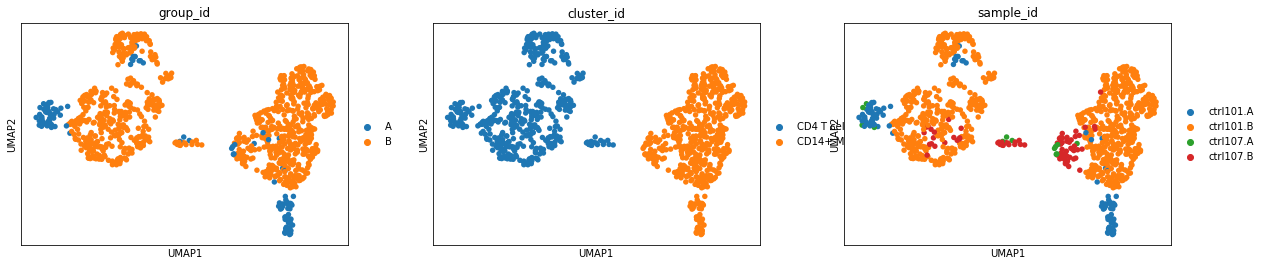

In [11]:
sc.tl.umap(adata1)
sc.pl.umap(adata1, color=['group_id','cluster_id','sample_id'])

### 1b) (ee=0.7, ep=0.05) (de=0.15, dp=0.05, dm=0.05, db=0.0)

In [12]:
df= pd.read_table("matrix_simdata/p_dd_tests/sim_matrix2.csv", index_col=0,sep=",")
adata = anndata.AnnData(df.T)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
adata.raw = adata
sc.pp.highly_variable_genes(adata, min_mean=0.05, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var['highly_variable']]
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
cell_annotation= pd.read_table('matrix_simdata/p_dd_tests/sim_celltag2.csv', sep=",", index_col=0)
cell_annotation
adata.obs.loc[:, "group_id"] = cell_annotation.loc[adata.obs_names, "group_id"]
adata.obs.loc[:, "cluster_id"] = cell_annotation.loc[adata.obs_names, "cluster_id"]
adata.obs.loc[:, "sample_id"] = cell_annotation.loc[adata.obs_names, "sample_id"]
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
adata.write('matrix_simdata/p_dd_tests/adata2.h5ad')

/home/morelli/anaconda3/envs/scrna_test/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:909: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
... storing 'group_id' as categorical
... storing 'cluster_id' as categorical
... storing 'sample_id' as categorical


In [15]:
adata2=sc.read('matrix_simdata/p_dd_tests/adata2.h5ad')

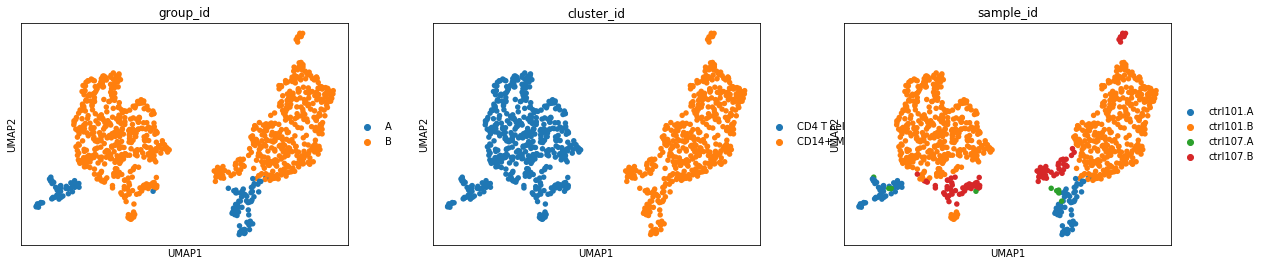

In [16]:
sc.tl.umap(adata2)
sc.pl.umap(adata2, color=['group_id','cluster_id','sample_id'])

### 1c) (ee=0.89, ep=0.01) (de=0.07, dp=0.01, dm=0.01, db=0.01)

In [17]:
df= pd.read_table("matrix_simdata/p_dd_tests/sim_matrix3.csv", index_col=0,sep=",")
adata = anndata.AnnData(df.T)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
adata.raw = adata
sc.pp.highly_variable_genes(adata, min_mean=0.05, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var['highly_variable']]
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
cell_annotation= pd.read_table('matrix_simdata/p_dd_tests/sim_celltag3.csv', sep=",", index_col=0)
cell_annotation
adata.obs.loc[:, "group_id"] = cell_annotation.loc[adata.obs_names, "group_id"]
adata.obs.loc[:, "cluster_id"] = cell_annotation.loc[adata.obs_names, "cluster_id"]
adata.obs.loc[:, "sample_id"] = cell_annotation.loc[adata.obs_names, "sample_id"]
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
adata.write('matrix_simdata/p_dd_tests/adata3.h5ad')

/home/morelli/anaconda3/envs/scrna_test/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:909: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
... storing 'group_id' as categorical
... storing 'cluster_id' as categorical
... storing 'sample_id' as categorical


In [18]:
adata3=sc.read('matrix_simdata/p_dd_tests/adata3.h5ad')

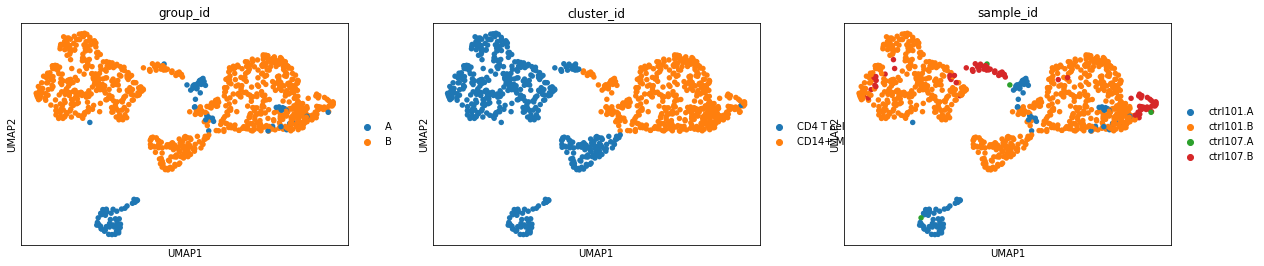

In [19]:
sc.tl.umap(adata3)
sc.pl.umap(adata3, color=['group_id','cluster_id','sample_id'])

### 1d) (ee=0.7, ep=0.05) (de=0.15, dp=0.05, dm=0.03, db=0.02)

In [20]:
df= pd.read_table("matrix_simdata/p_dd_tests/sim_matrix4.csv", index_col=0,sep=",")
adata = anndata.AnnData(df.T)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
adata.raw = adata
sc.pp.highly_variable_genes(adata, min_mean=0.05, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var['highly_variable']]
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
cell_annotation= pd.read_table('matrix_simdata/p_dd_tests/sim_celltag4.csv', sep=",", index_col=0)
cell_annotation
adata.obs.loc[:, "group_id"] = cell_annotation.loc[adata.obs_names, "group_id"]
adata.obs.loc[:, "cluster_id"] = cell_annotation.loc[adata.obs_names, "cluster_id"]
adata.obs.loc[:, "sample_id"] = cell_annotation.loc[adata.obs_names, "sample_id"]
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
adata.write('matrix_simdata/p_dd_tests/adata4.h5ad')

/home/morelli/anaconda3/envs/scrna_test/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:909: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
... storing 'group_id' as categorical
... storing 'cluster_id' as categorical
... storing 'sample_id' as categorical


In [21]:
adata4=sc.read('matrix_simdata/p_dd_tests/adata4.h5ad')

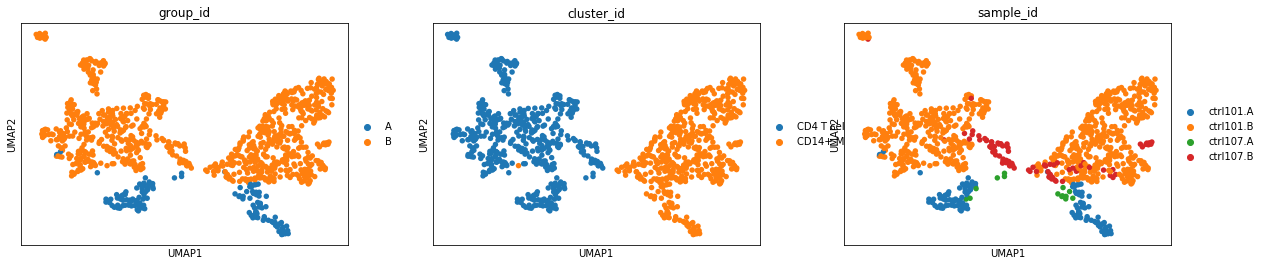

In [22]:
sc.tl.umap(adata4)
sc.pl.umap(adata4, color=['group_id','cluster_id','sample_id'])

adata2 e adata4 oltre a dividere correttamente le cd4 e cd14, dividono bene anche i gruppi A e B: per questo motivo le statistiche che rientrano nel range che mi interessa di sono i p_dd di adata2 e adata4; e sono meno ee ed e più geni differenzialmente espressi (ovvio). provo ad alzare un pò i geni egualmente espressi e ad abbassare quelli differenzialmente espressi

### 1e) (ee=0.75, ep=0.05) (de=0.2, dp=0, dm=0, db=0.0)

In [27]:
df= pd.read_table("matrix_simdata/p_dd_tests/sim_matrix5.csv", index_col=0,sep=",")
adata = anndata.AnnData(df.T)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
adata.raw = adata
sc.pp.highly_variable_genes(adata, min_mean=0.05, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var['highly_variable']]
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
cell_annotation= pd.read_table('matrix_simdata/p_dd_tests/sim_celltag5.csv', sep=",", index_col=0)
cell_annotation
adata.obs.loc[:, "group_id"] = cell_annotation.loc[adata.obs_names, "group_id"]
adata.obs.loc[:, "cluster_id"] = cell_annotation.loc[adata.obs_names, "cluster_id"]
adata.obs.loc[:, "sample_id"] = cell_annotation.loc[adata.obs_names, "sample_id"]
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
adata.write('matrix_simdata/p_dd_tests/adata5.h5ad')

/home/morelli/anaconda3/envs/scrna_test/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:909: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
... storing 'group_id' as categorical
... storing 'cluster_id' as categorical
... storing 'sample_id' as categorical


In [28]:
adata5=sc.read('matrix_simdata/p_dd_tests/adata5.h5ad')

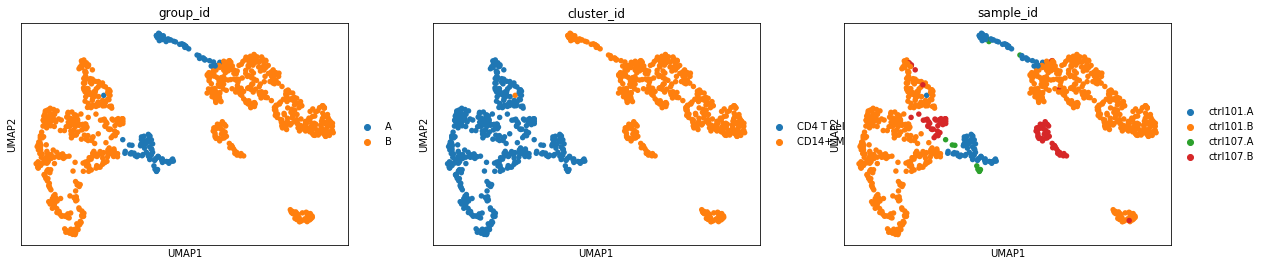

In [29]:
sc.tl.umap(adata5)
sc.pl.umap(adata5, color=['group_id','cluster_id','sample_id'])

### 1d) (ee=0.75, ep=0.05) (de=0.1, dp=0.5, dm=0.5, db=0.0)

In [30]:
df= pd.read_table("matrix_simdata/p_dd_tests/sim_matrix6.csv", index_col=0,sep=",")
adata = anndata.AnnData(df.T)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
adata.raw = adata
sc.pp.highly_variable_genes(adata, min_mean=0.05, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var['highly_variable']]
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
cell_annotation= pd.read_table('matrix_simdata/p_dd_tests/sim_celltag6.csv', sep=",", index_col=0)
cell_annotation
adata.obs.loc[:, "group_id"] = cell_annotation.loc[adata.obs_names, "group_id"]
adata.obs.loc[:, "cluster_id"] = cell_annotation.loc[adata.obs_names, "cluster_id"]
adata.obs.loc[:, "sample_id"] = cell_annotation.loc[adata.obs_names, "sample_id"]
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
adata.write('matrix_simdata/p_dd_tests/adata6.h5ad')

/home/morelli/anaconda3/envs/scrna_test/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:909: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
... storing 'group_id' as categorical
... storing 'cluster_id' as categorical
... storing 'sample_id' as categorical


In [31]:
adata6=sc.read('matrix_simdata/p_dd_tests/adata6.h5ad')

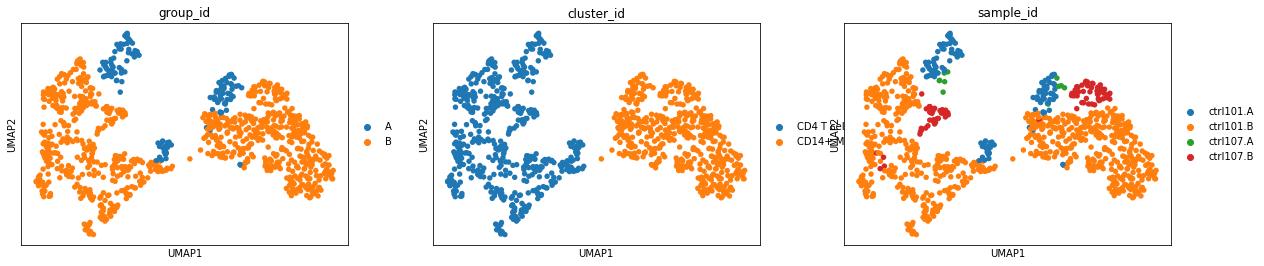

In [32]:
sc.tl.umap(adata6)
sc.pl.umap(adata6, color=['group_id','cluster_id','sample_id'])

adata6 sembra dividere bene sia cd4 che cd14, A e B e anche i sottogruppi. provo ad usare questo

# 2) lfc
### 2a) lfc=3
##### divise benissimo le codndizioni A e B, divise benissimo le cellule cd4 e cd13, divisi male i campioni

In [44]:
df= pd.read_table("matrix_simdata/lfc_tests/sim_matrix1.csv", index_col=0,sep=",")
adata = anndata.AnnData(df.T)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
adata.raw = adata
sc.pp.highly_variable_genes(adata, min_mean=0.05, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var['highly_variable']]
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
cell_annotation= pd.read_table('matrix_simdata/lfc_tests/sim_celltag1.csv', sep=",", index_col=0)
cell_annotation
adata.obs.loc[:, "group_id"] = cell_annotation.loc[adata.obs_names, "group_id"]
adata.obs.loc[:, "cluster_id"] = cell_annotation.loc[adata.obs_names, "cluster_id"]
adata.obs.loc[:, "sample_id"] = cell_annotation.loc[adata.obs_names, "sample_id"]
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
adata.write('matrix_simdata/lfc_tests/adata1.h5ad')

/home/morelli/anaconda3/envs/scrna_test/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:909: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
... storing 'group_id' as categorical
... storing 'cluster_id' as categorical
... storing 'sample_id' as categorical


In [45]:
adata=sc.read('matrix_simdata/lfc_tests/adata1.h5ad')

<IPython.core.display.Javascript object>


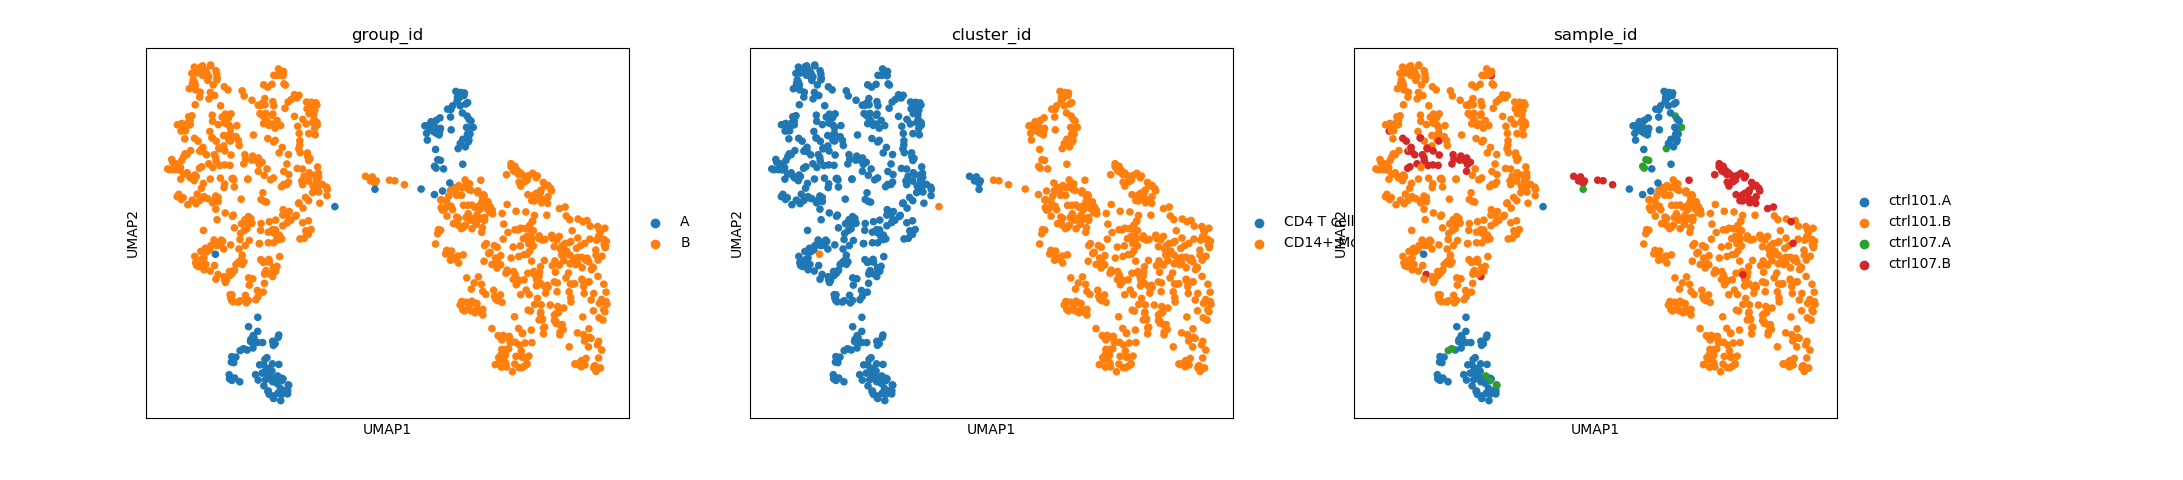

In [46]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=['group_id','cluster_id','sample_id'])

### 2b) lfc= c(1,1,1,1)
##### divide malissimo le condizioni A e B, bene le cellule, benissimo i due campioni 107 e 101

In [53]:
df= pd.read_table("matrix_simdata/lfc_tests/sim_matrix2.csv", index_col=0,sep=",")
adata = anndata.AnnData(df.T)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
adata.raw = adata
sc.pp.highly_variable_genes(adata, min_mean=0.05, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var['highly_variable']]
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
cell_annotation= pd.read_table('matrix_simdata/lfc_tests/sim_celltag2.csv', sep=",", index_col=0)
cell_annotation
adata.obs.loc[:, "group_id"] = cell_annotation.loc[adata.obs_names, "group_id"]
adata.obs.loc[:, "cluster_id"] = cell_annotation.loc[adata.obs_names, "cluster_id"]
adata.obs.loc[:, "sample_id"] = cell_annotation.loc[adata.obs_names, "sample_id"]
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
adata.write('matrix_simdata/lfc_tests/adata2.h5ad')

/home/morelli/anaconda3/envs/scrna_test/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:909: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
... storing 'group_id' as categorical
... storing 'cluster_id' as categorical
... storing 'sample_id' as categorical


In [54]:
adata=sc.read('matrix_simdata/lfc_tests/adata2.h5ad')

<IPython.core.display.Javascript object>


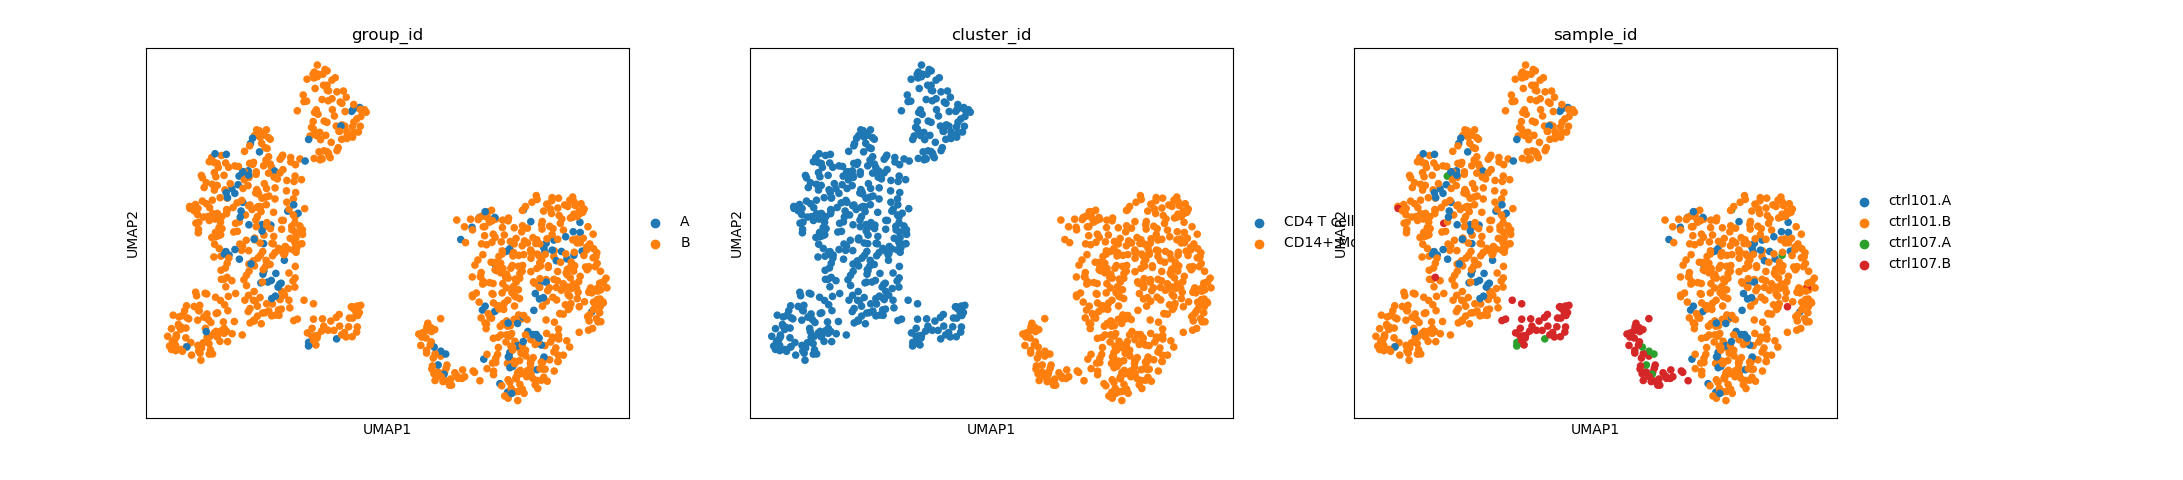

In [55]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=['group_id','cluster_id','sample_id'])

### 2c) lfc=c

In [71]:
df= pd.read_table("matrix_simdata/lfc_tests/sim_matrix3.csv", index_col=0,sep=",")
adata = anndata.AnnData(df.T)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
adata.raw = adata
sc.pp.highly_variable_genes(adata, min_mean=0.05, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var['highly_variable']]
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
cell_annotation= pd.read_table('matrix_simdata/lfc_tests/sim_celltag3.csv', sep=",", index_col=0)
cell_annotation
adata.obs.loc[:, "group_id"] = cell_annotation.loc[adata.obs_names, "group_id"]
adata.obs.loc[:, "cluster_id"] = cell_annotation.loc[adata.obs_names, "cluster_id"]
adata.obs.loc[:, "sample_id"] = cell_annotation.loc[adata.obs_names, "sample_id"]
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
adata.write('matrix_simdata/lfc_tests/adata3.h5ad')

/home/morelli/anaconda3/envs/scrna_test/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:909: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
... storing 'group_id' as categorical
... storing 'cluster_id' as categorical
... storing 'sample_id' as categorical


In [72]:
adata=sc.read('matrix_simdata/lfc_tests/adata3.h5ad')

<IPython.core.display.Javascript object>


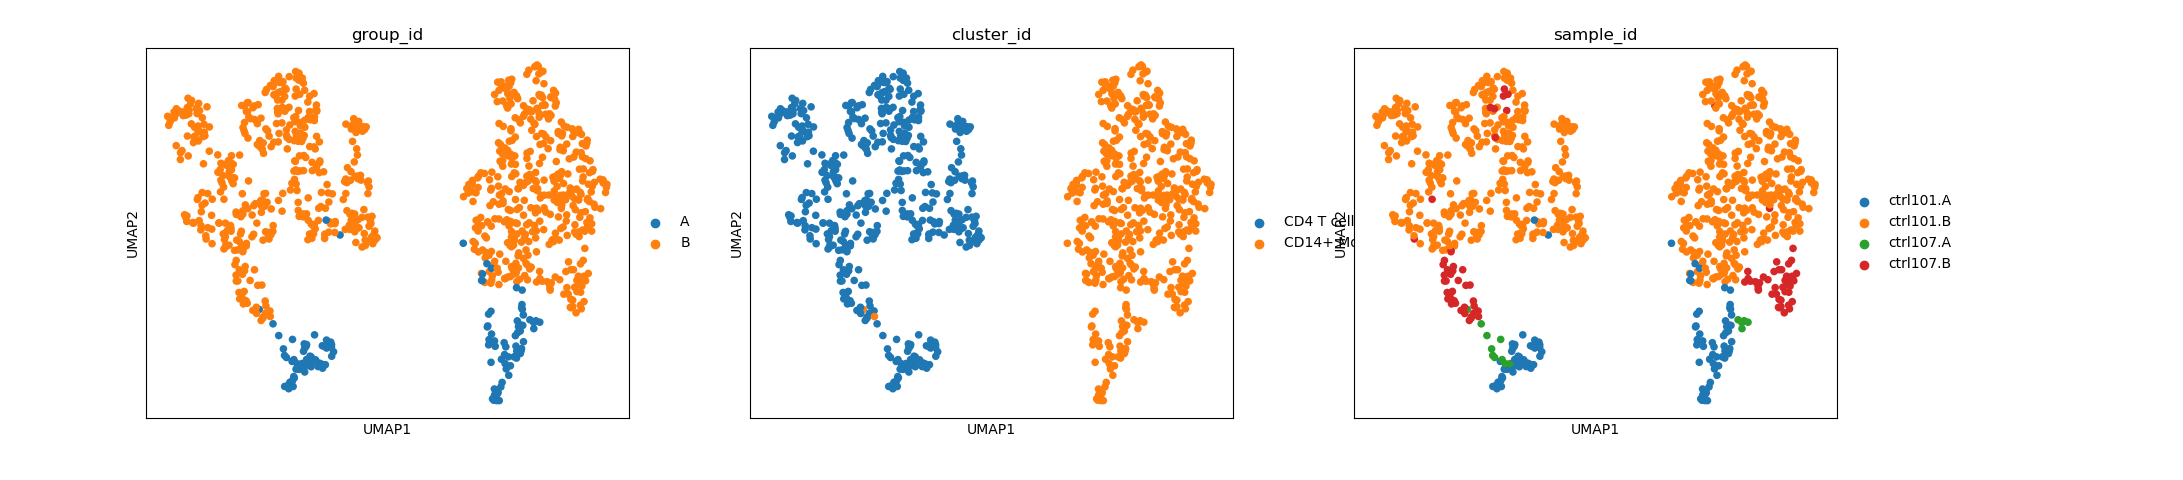

In [73]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=['group_id','cluster_id','sample_id'])

# test di vari simdata
### 1) 

In [4]:
df= pd.read_table("matrix_simdata/random/sim_matrix1.csv", index_col=0,sep=",")
adata = anndata.AnnData(df.T)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
adata.raw = adata
sc.pp.highly_variable_genes(adata, min_mean=0.05, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var['highly_variable']]
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
cell_annotation= pd.read_table('matrix_simdata/random/sim_celltag1.csv', sep=",", index_col=0)
cell_annotation
adata.obs.loc[:, "group_id"] = cell_annotation.loc[adata.obs_names, "group_id"]
adata.obs.loc[:, "cluster_id"] = cell_annotation.loc[adata.obs_names, "cluster_id"]
adata.obs.loc[:, "sample_id"] = cell_annotation.loc[adata.obs_names, "sample_id"]
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
adata.write('matrix_simdata/random/adata1.h5ad')

/home/morelli/anaconda3/envs/scrna_test/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:909: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
... storing 'group_id' as categorical
... storing 'cluster_id' as categorical
... storing 'sample_id' as categorical


In [5]:
adata=sc.read('matrix_simdata/random/adata1.h5ad')

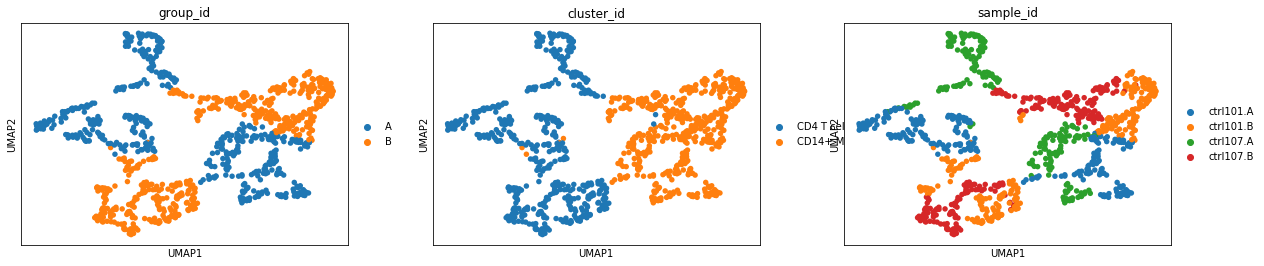

In [6]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=['group_id','cluster_id','sample_id'])

### 2)